In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt

In [2]:
df_resumo_empresas_inner = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_resumo_empresas_inner.csv', delimiter = ',')

In [3]:
df_resumo_empresas_inner

,id_empresa,nome_empresa,valor_doado,valor_reembolsado,percentual_de_retorno
0,3777848930,LUCIANO TADAU YAMAGUTI SATO,3000.00,44.00,-98.533333
1,4197917368,YARA MARIA LIRA PAIVA E SILVA,300.00,42600.00,14100.000000
2,9636182884,MAURICIO NUNES MARTINS,3000.00,4000.00,33.333333
3,17472415200,CARLOS AUGUSTO LEMOS DE OLIVEIRA,5160.00,99000.00,1818.604651
4,49196006900,LOENI LUCIA DAL PRA,30000.00,29200.00,-2.666667
5,71480625272,JULIANA DOS SANTOS RODRIGUES,1448.00,129700.00,8857.182320
6,83336532191,MARCONES RIBEIRO DE CASTRO,8500.00,10000.00,17.647059
7,97626000168,BRASAL COMBUSTIVEIS LTDA,14130.00,9566.98,-32.293135
8,110791000102,IRMAOS MARINHO LTDA,8500.00,1207.92,-85.789176
9,158540000106,COP BEM GRAFICA E EDITORA LTDA EPP,100.00,104160.00,104060.000000


In [4]:
def comunidade(i):
        
        if i < 0:
            return 'Mal investmento'
        elif i >=1 and i < 50:
            return 'Investimento mediano'
        elif i >= 50 and i <=100:
            return 'Bom investimento'
        elif i > 100 and i <=1000:
            return 'Ótimo investimento'
        elif i > 1000:
            return 'Excelente investimento'
        

df_resumo_empresas_inner['classificacao_roi'] = df_resumo_empresas_inner['percentual_de_retorno'].map(comunidade)


ValueError: c of shape (328,) not acceptable as a color sequence for x with size 328, y with size 328

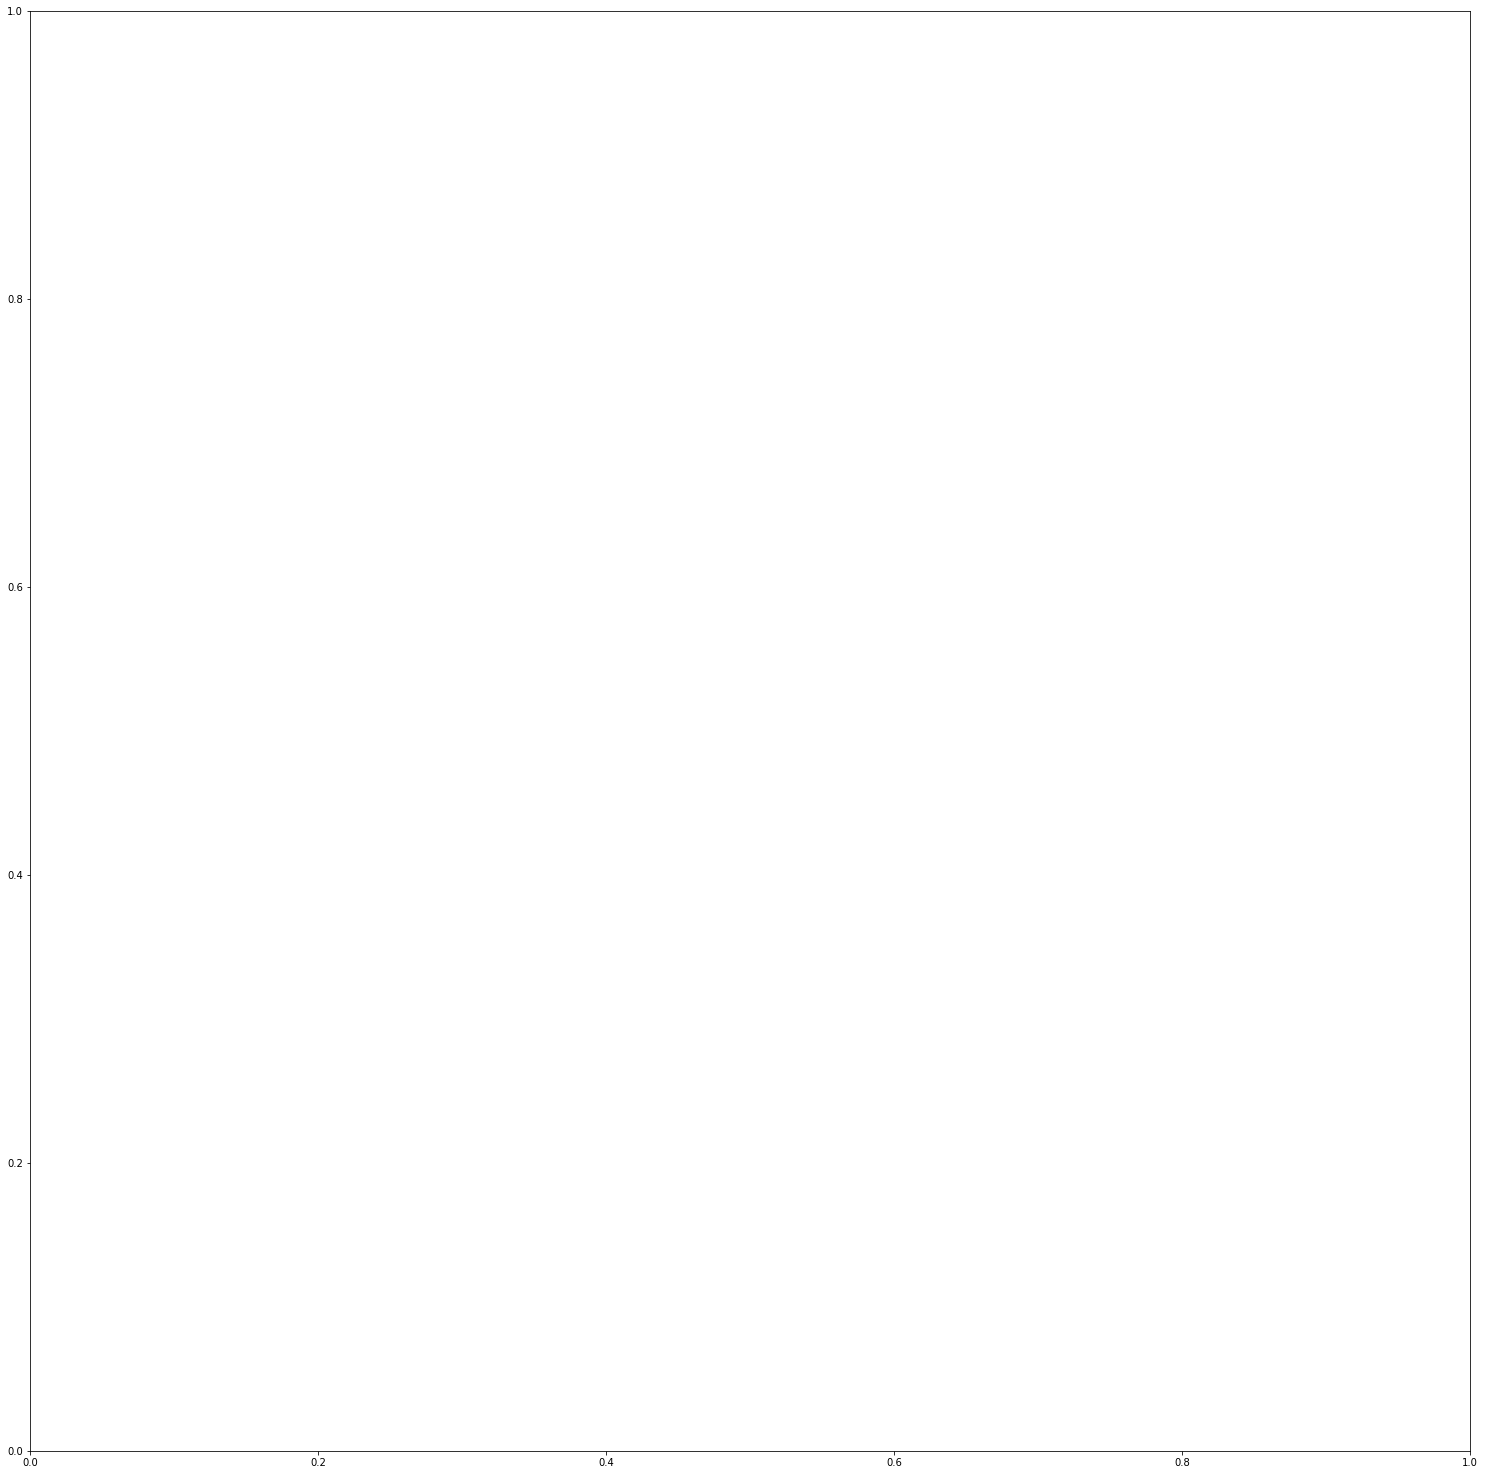

In [7]:
#2.1 Rede representando a o retorno sobre o investimento

plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})

G = nx.Graph()
G.add_nodes_from([a for a in df_resumo_empresas_inner.index])
for ie in set(df_resumo_empresas_inner['id_empresa']):
    indices = df_resumo_empresas_inner[df_resumo_empresas_inner['id_empresa'] == ie].index
    G.add_edges_from(it.product(indices, indices))
    
for cr in set(df_resumo_empresas_inner['classificacao_roi']):
    indices = df_resumo_empresas_inner[df_resumo_empresas_inner['classificacao_roi']==cr].index
    G.add_edges_from(it.product(indices, indices))


#plt.title('Classificação de acordo com o ROI')
color_mapping = {'Mal investmento': 'blue',
                 'Investimento mediano':'red',
                 'Bom investimento':'green',
                 'Ótimo investimento': 'yellow',
                 'Excelente investimento': 'orange' }

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(20,20))
nx.draw(G,pos,node_size = 100, width = 0.5,node_color=df_resumo_empresas_inner['classificacao_roi'].replace(color_mapping),with_labels=False,
        cmap='RdYlBu', vmin=0, vmax=300)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
plt.savefig('ROI')
plt.title('Classificação de acordo com o ROI')
#plt.plot([color_mapping.values()], label = color_mapping.keys())
plt.legend()
plt.show()

In [45]:
df_resumo_empresas_inner

,id_empresa,nome_empresa,valor_doado,valor_reembolsado,percentual_de_retorno,classificacao_roi
0,3777848930,LUCIANO TADAU YAMAGUTI SATO,3000.00,44.00,-98.533333,Mal investmento
1,4197917368,YARA MARIA LIRA PAIVA E SILVA,300.00,42600.00,14100.000000,Excelente investimento
2,9636182884,MAURICIO NUNES MARTINS,3000.00,4000.00,33.333333,Investimento mediano
3,17472415200,CARLOS AUGUSTO LEMOS DE OLIVEIRA,5160.00,99000.00,1818.604651,Excelente investimento
4,49196006900,LOENI LUCIA DAL PRA,30000.00,29200.00,-2.666667,Mal investmento
5,71480625272,JULIANA DOS SANTOS RODRIGUES,1448.00,129700.00,8857.182320,Excelente investimento
6,83336532191,MARCONES RIBEIRO DE CASTRO,8500.00,10000.00,17.647059,Investimento mediano
7,97626000168,BRASAL COMBUSTIVEIS LTDA,14130.00,9566.98,-32.293135,Mal investmento
8,110791000102,IRMAOS MARINHO LTDA,8500.00,1207.92,-85.789176,Mal investmento
9,158540000106,COP BEM GRAFICA E EDITORA LTDA EPP,100.00,104160.00,104060.000000,Excelente investimento


In [54]:
df = pd.DataFrame({'id_emp':[13524791000109, 12053850000137, 4707821000113, 4707821000112,4707821000114, 5707821000114 ],
               'name_dep': ['DIONILSO MATEUS MARCON', 'JOSE AUGUSTO ROSA', 'LUCIO ANTONIO MOSQUINI', 'DIEGO ALVES','BRUNO HENRIQUE', 'GABRIEL BARBOSA'],
               'classification_roi':['very bad', 'bad', 'medium', 'good', 'very good', 'very good']
              })

In [55]:
df

,id_emp,name_dep,classification_roi
0,13524791000109,DIONILSO MATEUS MARCON,very bad
1,12053850000137,JOSE AUGUSTO ROSA,bad
2,4707821000113,LUCIO ANTONIO MOSQUINI,medium
3,4707821000112,DIEGO ALVES,good
4,4707821000114,BRUNO HENRIQUE,very good
5,5707821000114,GABRIEL BARBOSA,very good


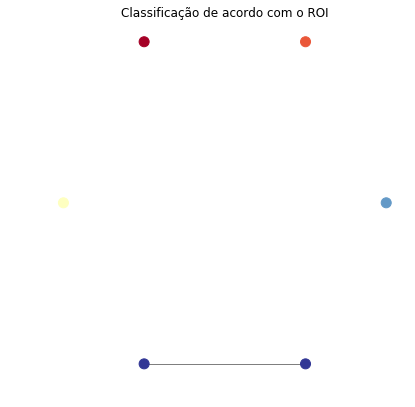

In [56]:
#2.1 Rede representando a o retorno sobre o investimento

plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})

G = nx.Graph()
G.add_nodes_from([a for a in df.index])
for ie in set(df['id_emp']):
    indices = df[df['id_emp'] == ie].index
    G.add_edges_from(it.product(indices, indices))
    
for cr in set(df['classification_roi']):
    indices = df[df['classification_roi']==cr].index
    G.add_edges_from(it.product(indices, indices))


#plt.title('Classificação de acordo com o ROI')
color_mapping = {'very bad': 250,
                 'bad':50,
                 'medium':1,
                 'good': 150,
                 'very good': 300 }

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(5,5))
nx.draw(G,pos,node_size = 100, width = 0.5,node_color=df['classification_roi'].replace(color_mapping),with_labels=False,
        cmap='RdYlBu', vmin=0, vmax=300)
plt.savefig('ROI')
plt.title('Classificação de acordo com o ROI')
plt.show()